In [ ]:
import geopandas as gpd

mountains = gpd.read_file('/data/acker/shapefiles/ne_10m_geography_regions_polys_ExportFeatures.shp')
mountains

,FEATURECLA,NAME,NAMEALT,REGION,SUBREGION,MIN_LABEL,MAX_LABEL,SCALERANK,LABEL,WIKIDATAID,...,NAME_ZH,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,Shape_Leng,Shape_Area,geometry
0,Range/mtn,Wasatch Range,None,North America,None,6.0,11.0,6,Wasatch Range,Q1544388,...,瓦薩奇山脈,1159102607,رشته کوه واساچ,רכס ווסאץ',хребет Васатч,واساچ رینج,瓦薩奇山脈,7.734642,1.779819,"POLYGON ((-111.29278 42.26844, -111.20018 42.1..."
1,Range/mtn,Maya Mts.,None,North America,Central America,5.4,10.0,5,Maya Mts.,Q765874,...,馬雅山脈,1159102981,رشتهکوه مایا,הרי מאיה,Мая,مایا پہاڑ,馬雅山脈,3.950999,0.877859,"POLYGON ((-88.98107 16.24024, -89.31792 16.111..."
2,Range/mtn,Front Range,None,North America,None,5.4,10.0,5,Front Range,Q1470027,...,弗兰特岭,1159102983,رشته کوه فرانت,רכס פרונט,Фронт-Рендж,فرنٹ رینج,弗兰特岭,7.558764,2.654052,"POLYGON ((-104.95598 38.56428, -105.10631 38.4..."
3,Range/mtn,Bitterroot Range,None,North America,None,5.4,10.0,5,Bitterroot Range,Q879014,...,比特鲁特岭,1159102985,رشته کوه بیتروت,רכס ביטררוט,хребет Біттеррут,بٹر روٹ رینج,比特鲁特岭,16.432926,4.019554,"POLYGON ((-114.81194 47.41749, -114.80663 47.3..."
4,Range/mtn,Birch Mts.,None,North America,None,5.4,10.0,5,Birch Mts.,None,...,伯奇山脉,1730071739,کوه های بیرچ,רכס בירץ',гори Бірх,برچ پہاڑ,伯瑞奇山,11.297343,6.684340,"POLYGON ((-115.15307 58.36878, -114.4016 58.55..."
5,Range/mtn,Caribou Mts.,None,North America,None,5.4,10.0,5,Caribou Mts.,Q3658589,...,卡里布山脉,1159103113,کوهستان کاریبو,רכס קאריבו,гори Карибу,کیریبو پہاڑ,卡里布山,8.123813,4.341997,"POLYGON ((-113.79979 58.67463, -114.4016 58.55..."
6,Range/mtn,Cassiar Mts.,None,North America,None,5.4,10.0,5,Cassiar Mts.,Q22449163,...,卡西尔山脉,1159103117,کوهستان کاسیر,רכס קסיאר,гори Кассіар,کیسیار پہاڑ,卡西亞山,23.958594,20.533247,"POLYGON ((-129.76067 61.82551, -129.47844 61.5..."
7,Range/mtn,Ogilvie Mts.,None,North America,None,5.4,10.0,5,Ogilvie Mts.,Q283784,...,奥吉尔维山脉,1159103119,کوه های اوگیلیو,רכס אוגילוויה,гори Огілві,اوگلوی پہاڑ,奥吉尔维山脉,12.390930,4.594092,"POLYGON ((-138.31994 64.99616, -138.08184 64.7..."
8,Range/mtn,Wrangell Mts.,None,North America,None,5.4,10.0,5,Wrangell Mts.,Q616559,...,蘭格爾山脈,1159103121,رشته کوه رانگل,הרי ראנגל,Гори Врангеля,رینگل پہاڑ,蘭格爾山脈,9.466754,4.490297,"POLYGON ((-141.49004 62.80085, -141.38189 62.6..."
9,Range/mtn,Adirondack Mts.,None,North America,None,5.4,10.0,5,None,Q357546,...,阿第伦达克山脉,1730071761,کوههای ادیراندک,הרי אדירונדאק,Адірондак,ایڈیرونڈیک پہاڑ,阿第伦达克山脉,7.945345,4.067537,"POLYGON ((-73.58428 43.08686, -73.6737 42.9297..."


In [2]:
mountains.columns

Index(['FEATURECLA', 'NAME', 'NAMEALT', 'REGION', 'SUBREGION', 'MIN_LABEL',
       'MAX_LABEL', 'SCALERANK', 'LABEL', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI',
       'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL',
       'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI',
       'NAME_ZH', 'NE_ID', 'NAME_FA', 'NAME_HE', 'NAME_UK', 'NAME_UR',
       'NAME_ZHT', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:
mountains = mountains.to_crs(epsg=4269)

In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)
counties_conus = counties_conus.to_crs(epsg=4269)

<GeoAxes: >

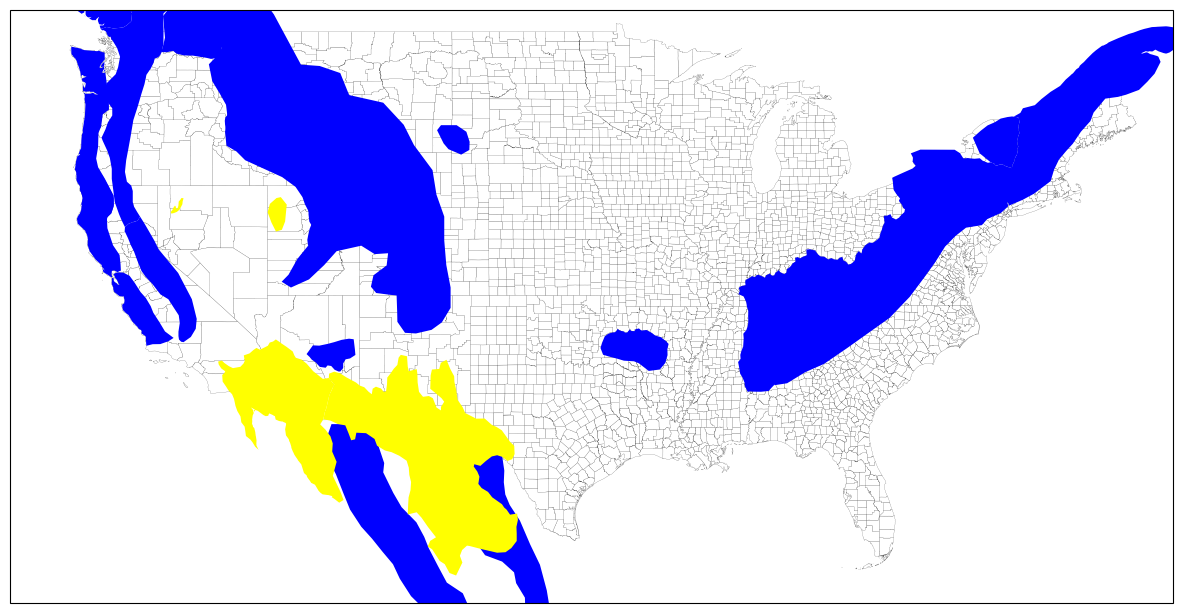

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl

cmap = 'turbo'
norm = mpl.colors.Normalize(vmin=4, vmax=12)  # Adjust vmin and vmax based on your data range

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-128, -65, 23, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Plot the data for each map, including the color for missing data
counties_conus.plot(
    linewidth=0.1, edgecolor='black', 
    ax=ax_conus, color='white'
)
mountains.plot(
    linewidth=0.1, edgecolor=None, 
    ax=ax_conus, color='blue'
)
'''deserts.plot(
    linewidth=0.1, edgecolor=None, 
    ax=ax_conus, color='yellow'
)'''

In [6]:
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [7]:
merged_mountains = gpd.sjoin(df, mountains, how='inner', predicate='intersects')
merged_mountains

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry,index_right,...,NAME_VI,NAME_ZH,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,Shape_Leng,Shape_Area
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",31,...,dãy núi Alaska,阿拉斯加山脈,1159104201,رشته کوه آلاسکا,רכס אלסקה,Аляскинський хребет,الاسکا رینج,阿拉斯加山脈,27.694646,18.836068
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",23,...,Sierra Nevada,內華達山脈,1159103951,سیرا نوادا,סיירה נבדה,Сьєрра-Невада,سیرا نیوادا,內華達山脈,14.511473,7.178142
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",30,...,Dãy núi Cascade,喀斯喀特山脉,1159104199,کسکیدز,רכס קסקייד,Каскадні гори,کاسکایڈ رینج,喀斯喀特山脉,28.381531,16.756119
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",23,...,Sierra Nevada,內華達山脈,1159103951,سیرا نوادا,סיירה נבדה,Сьєрра-Невада,سیرا نیوادا,內華達山脈,14.511473,7.178142
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",21,...,Dãy núi Duyên hải Thái Bình Dương,太平洋海岸山脈,1159103947,رشتهکوههای ساحلی اقیانوس آرام,רכסי החוף הפסיפי,Берегові Хребти,کوسٹ رینجز,太平洋海岸山脈,41.517779,17.419125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,56035,4.866667,56,035,3061,56_035,3.7,"POLYGON ((-110.62343 42.7792, -110.60511 42.77...",32,...,dãy núi Rocky,洛磯山脈,1159104311,رشتهکوه راکی,הרי הרוקי,Скелясті гори,سلسلہ کوہ راکی,洛磯山脈,81.879200,126.536130
528,528,23019,4.750000,23,019,3079,23_019,4.8,"POLYGON ((-69.35567 45.07347, -69.24996 45.087...",27,...,Dãy Appalachian,阿巴拉契亚山脉,1159104191,رشتهکوه آپالیشین,הרי האפלצ'ים,Аппалачі,اپیلاچیان پہاڑ,阿巴拉契亚山脉,74.246972,90.369441
529,529,08103,4.700000,08,103,3087,08_103,7.2,"POLYGON ((-109.05087 39.74643, -109.05062 39.8...",32,...,dãy núi Rocky,洛磯山脈,1159104311,رشتهکوه راکی,הרי הרוקי,Скелясті гори,سلسلہ کوہ راکی,洛磯山脈,81.879200,126.536130
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",25,...,DÃY CHUGACH,楚加奇山,1159103955,کوهستان چوگاچ,הרי צ'וגאץ',Чугацькі гори,چوگاچ پہاڑ,楚加奇山,23.887738,9.526826


In [9]:
# Create a column in mountain counties to indicate they are in the mountain region
merged_mountains =merged_mountains[['GEOID']].copy()
merged_mountains['mountain_region'] = 'Mountain'

# Merge with all counties, marking non-mountain counties
all_counties_gdf = df.merge(merged_mountains, on='GEOID', how='left')

# Fill in missing values as 'Non-Mountain'
all_counties_gdf['mountain_region'] = all_counties_gdf['mountain_region'].fillna('Non-Mountain')


In [10]:
all_counties_gdf

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry,mountain_region
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",Mountain
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",Mountain
2,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",Mountain
3,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",Mountain
4,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",Mountain
...,...,...,...,...,...,...,...,...,...,...
589,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",Mountain
590,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",Mountain
591,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",Non-Mountain
592,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",Non-Mountain


In [11]:
all_counties_gdf = all_counties_gdf.drop_duplicates(subset=['GEOID'])

In [12]:
all_counties_gdf.to_file('/data/acker/ALA/paper2/mountain_counties.shp')

/tmp/ipykernel_42535/290897176.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_counties_gdf.to_file('/data/acker/ALA/paper2/mountain_counties.shp')
/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'mountain_region' to 'mountain_r'
  ogr_write(


In [71]:
merged_df = all_counties_gdf.rename(columns={'Design Val':'Design Value'})

In [72]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['abs_diff'] = abs(merged_df['PM25_90th'] - merged_df['Design Value'])

In [ ]:
m = merged_df[merged_df['mountain_region'] == 'Mountain']
m['abs_diff'].describe()

count   14.00
mean     1.91
std      1.60
min      0.30
25%      0.55
50%      1.68
75%      2.28
max      5.33
Name: abs_diff, dtype: float64

In [73]:
m = merged_df[merged_df['mountain_region'] == 'Non-Mountain']
m['abs_diff'].describe()

count   299.00
mean      0.86
std       0.79
min       0.00
25%       0.30
50%       0.63
75%       1.20
max       5.33
Name: abs_diff, dtype: float64

In [57]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'TP'
    elif cdv > threshold and cdve <= threshold:
        return 'FP'
    elif cdv <= threshold and cdve > threshold:
        return 'FN'
    else:
        return 'TN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
TP = merged_df[merged_df['classification'] == 'TP']
FP = merged_df[merged_df['classification'] == 'FP']
FN = merged_df[merged_df['classification'] == 'FN']
TN = merged_df[merged_df['classification'] == 'TN']
print('TP:',len(TP))
print('FP:',len(FP))
print('FN:', len(FN))
print('TN:',len(TN))

classification
TN    376
TP     63
FP     52
FN     45
Name: count, dtype: int64
TP: 63
FP: 52
FN: 45
TN: 376


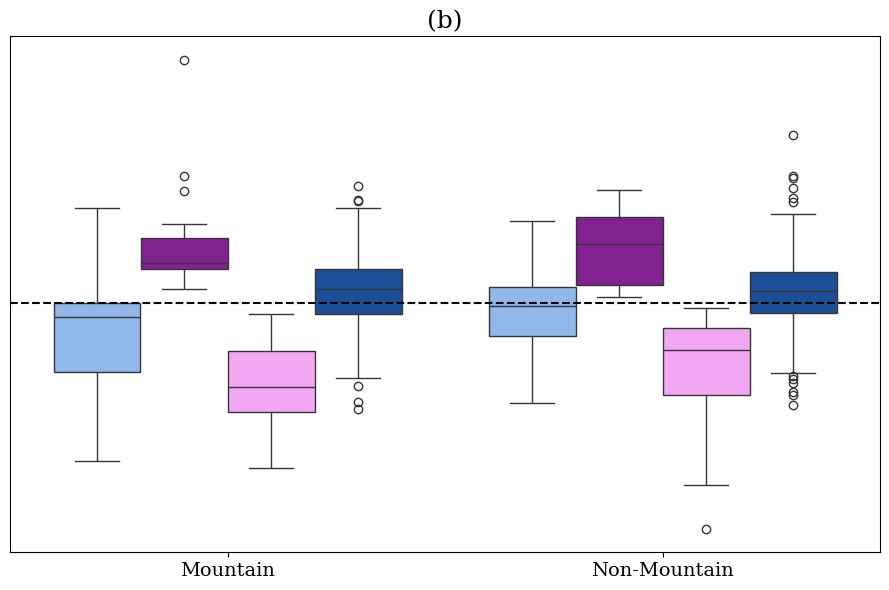

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Create the boxplot
sns.boxplot(
    data=merged_df,
    x='mountain_region',
    y='diff',
    hue='classification',
    palette={'TP': '#83b5fa', 'TN': '#074cad', 'FP': '#fe9bfe', 'FN': '#8E0EA5'}
)

# Style and formatting
plt.rcParams["font.family"] = "serif"

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=14)
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.ylabel('', fontsize=16)
plt.title('(b)', fontsize=18)
plt.legend().remove()
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
# Group by classification and mountain region
stats = (
    merged_df
    .groupby(['classification', 'mountain_region'])['diff']
    .agg(['count', 'mean', 'std', 'min', 'max', 'median'])
    .reset_index()
    .sort_values(by=['classification', 'mountain_region'])
)

# Add a new column for range
stats['range'] = stats['max'] - stats['min']

# Display the summary
pd.set_option('display.float_format', '{:.2f}'.format)
print(stats)


  classification mountain_region  count  mean  std   min   max  median  range
0             FN        Mountain     17  1.43 1.33  0.33  5.73    0.93   5.40
1             FN    Non-Mountain     28  1.29 0.85  0.13  2.67    1.39   2.53
2             FP        Mountain     22 -1.93 1.11 -3.90 -0.27   -1.98   3.63
3             FP    Non-Mountain     30 -1.50 1.24 -5.33 -0.13   -1.12   5.20
4             TN        Mountain    171  0.25 0.92 -2.50  2.77    0.33   5.27
5             TN    Non-Mountain    205  0.24 0.93 -2.40  3.97    0.27   6.37
6             TP        Mountain     27 -0.82 1.48 -3.73  2.23   -0.33   5.97
7             TP    Non-Mountain     36 -0.22 1.02 -2.37  1.93   -0.07   4.30


In [ ]:
deserts = gpd.read_file('/data/acker/shapefiles/ne_10m_geography_regions_polys_ExportFeatures1.shp')
deserts = deserts.to_crs(epsg=4269)

In [ ]:
merged_deserts = gpd.sjoin(df, deserts, how='inner', predicate='intersects')
merged_deserts

In [ ]:
# Create a column in mountain counties to indicate they are in the mountain region
merged_deserts =merged_deserts[['GEOID']].copy()
merged_deserts['desert_region'] = 'Desert'

# Merge with all counties, marking non-mountain counties
all_counties_gdf = df.merge(merged_deserts, on='GEOID', how='left')

# Fill in missing values as 'Non-Mountain'
all_counties_gdf['desert_region'] = all_counties_gdf['desert_region'].fillna('Non-Desert')


In [ ]:
all_counties_gdf = all_counties_gdf.drop_duplicates(subset=['GEOID'])

In [ ]:
merged_df = all_counties_gdf.rename(columns={'Design Val':'Design Value'})

In [ ]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['abs_diff'] = abs(merged_df['PM25_90th'] - merged_df['Design Value'])

In [ ]:
m = merged_df[merged_df['desert_region'] == 'Desert']
m['abs_diff'].describe()

In [ ]:
m = merged_df[merged_df['desert_region'] == 'Non-Desert']
m['abs_diff'].describe()

In [ ]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'TP'
    elif cdv > threshold and cdve <= threshold:
        return 'FP'
    elif cdv <= threshold and cdve > threshold:
        return 'FN'
    else:
        return 'TN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
TP = merged_df[merged_df['classification'] == 'TP']
FP = merged_df[merged_df['classification'] == 'FP']
FN = merged_df[merged_df['classification'] == 'FN']
TN = merged_df[merged_df['classification'] == 'TN']
print('TP:',len(TP))
print('FP:',len(FP))
print('FN:', len(FN))
print('TN:',len(TN))

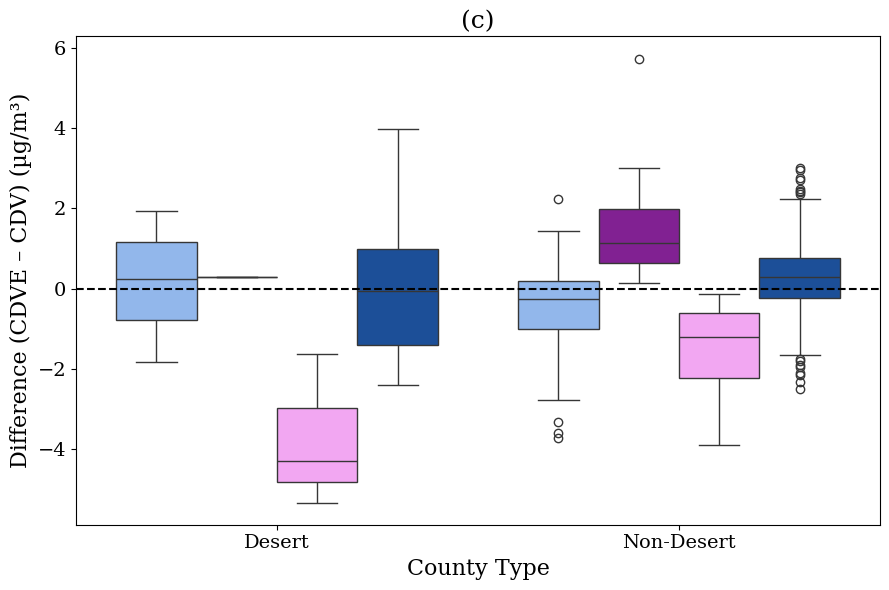

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Force 'Desert' to be on the left by setting the order explicitly
sns.boxplot(
    data=merged_df,
    x='desert_region',
    y='diff',
    hue='classification',
    order=['Desert', 'Non-Desert'],  # <- This line enforces the order
    palette={'TP': '#83b5fa', 'TN': '#074cad', 'FP': '#fe9bfe', 'FN': '#8E0EA5'}
)

# Style and formatting
plt.rcParams["font.family"] = "serif"
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('County Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=16)
plt.title('(c)', fontsize=18)
plt.legend().remove()
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
# Group by classification and mountain region
stats = (
    merged_df
    .groupby(['classification', 'desert_region'])['diff']
    .agg(['count', 'mean', 'std', 'min', 'max', 'median'])
    .reset_index()
    .sort_values(by=['classification', 'desert_region'])
)

# Add a new column for range
stats['range'] = stats['max'] - stats['min']

# Display the summary
pd.set_option('display.float_format', '{:.2f}'.format)
print(stats)


  classification desert_region  count  mean  std   min   max  median  range
0             FN        Desert      1  0.30  NaN  0.30  0.30    0.30   0.00
1             FN    Non-Desert     44  1.37 1.04  0.13  5.73    1.13   5.60
2             FP        Desert      3 -3.76 1.91 -5.33 -1.63   -4.30   3.70
3             FP    Non-Desert     49 -1.56 1.04 -3.90 -0.13   -1.20   3.77
4             TN        Desert      6  0.15 2.28 -2.40  3.97   -0.07   6.37
5             TN    Non-Desert    370  0.25 0.90 -2.50  3.00    0.28   5.50
6             TP        Desert      4  0.14 1.63 -1.83  1.93    0.23   3.77
7             TP    Non-Desert     59 -0.52 1.24 -3.73  2.23   -0.27   5.97


In [42]:
burned_FP = FP[FP['total_burned_acres'] > 0]
burned_FP['total_burned_acres'].describe()

count        20.00000
mean     105980.85000
std      153065.43377
min         526.00000
25%        7039.50000
50%       39553.50000
75%      135338.75000
max      543458.00000
Name: total_burned_acres, dtype: float64

In [43]:
burned_TP = TP[TP['total_burned_acres'] > 0]
burned_TP['total_burned_acres'].describe()

count    1.600000e+01
mean     1.831159e+05
std      3.007187e+05
min      5.940000e+02
25%      6.162250e+03
50%      3.461200e+04
75%      2.222628e+05
max      1.088163e+06
Name: total_burned_acres, dtype: float64

In [44]:
burned_TN = TN[TN['total_burned_acres'] > 0]
burned_TN['total_burned_acres'].describe()

count        93.000000
mean      18812.301075
std       39762.247521
min         503.000000
25%        2074.000000
50%        6568.000000
75%       23460.000000
max      352046.000000
Name: total_burned_acres, dtype: float64

/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


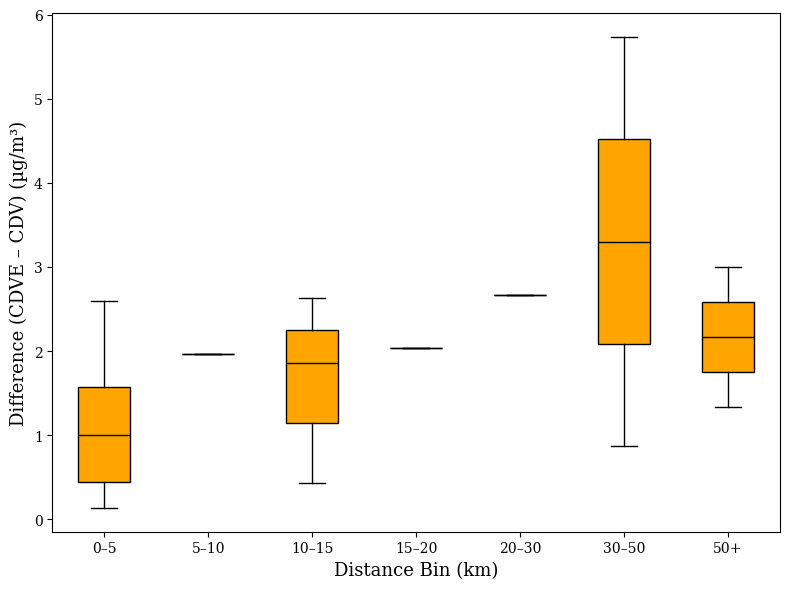

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter only False Negatives
fn_df = FN.copy()

# Define distance bins (e.g., every 5 km up to 50+ km)
bins = [0, 500, 1000, 5000, 10000, 50000, 100000, np.inf]
labels = ['0–5', '5–10', '10–15', '15–20', '20–30', '30–50', '50+']

# Assign each FN county to a distance bin
FN['burned_bins'] = pd.cut(FN['total_burned_acres'], bins=bins, labels=labels, right=False)

# Prepare boxplot data
boxplot_data = [FN[FN['burned_bins'] == label]['diff'] for label in labels]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='orange', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

# Labels and formatting
plt.xlabel('Distance Bin (km)', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
#plt.title('(f)', fontsize=14)
plt.rcParams["font.family"] = "serif"
plt.grid(False)
plt.tight_layout()
plt.show()
